# Examen final PEIA
## Grupo 5
* a1612 - Christopher Charaf Herrera
* a1618 - Myrna Degano
* a1620 - Gustavo Rivas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

from babel.dates import format_date, format_datetime, format_time, format_timedelta, Locale, get_day_names
from datetime import date
from IPython.display import HTML

xfile = 'Grupo_5.xlsx'
locale = Locale('es', 'ES')


## Lectura del set de datos

In [2]:
print("\nTienda 'La Floresta':")

df_La_Floresta = pd.read_excel(xfile, sheet_name='La Floresta', header=0)

print(df_La_Floresta.info())
df_La_Floresta.head()



Tienda 'La Floresta':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   365 non-null    datetime64[ns]
 1   Ventas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB
None


,Fecha,Ventas
0,2023-01-01,11996.124122
1,2023-01-02,16048.495794
2,2023-01-03,18003.638225
3,2023-01-04,20012.607108
4,2023-01-05,16710.240063


In [3]:
print("\nTienda 'Santa Ana':")

df_Santa_Ana = pd.read_excel(xfile, sheet_name='Santa Ana', header=0)

print(df_Santa_Ana.info())
df_Santa_Ana.head()


Tienda 'Santa Ana':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   365 non-null    datetime64[ns]
 1   Ventas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB
None


,Fecha,Ventas
0,2023-01-01,11390.705369
1,2023-01-02,16122.907022
2,2023-01-03,19609.303029
3,2023-01-04,16734.047386
4,2023-01-05,17983.552354


## Ventas mensuales por tienda

In [4]:
ventas_mensuales_LF = df_La_Floresta.groupby(df_La_Floresta['Fecha'].dt.to_period('M'))['Ventas'].sum()
df_ventas_mensuales_LF = pd.DataFrame(ventas_mensuales_LF)
display(df_ventas_mensuales_LF)

,Ventas
Fecha,
2023-01,518276.809601
2023-02,525269.955847
2023-03,652387.603906
2023-04,599982.260459
2023-05,662528.437527
2023-06,686416.727300
2023-07,635172.453200
2023-08,676583.099018
2023-09,673080.085808


In [5]:
ventas_mensuales_SA = df_Santa_Ana.groupby(df_Santa_Ana['Fecha'].dt.to_period('M'))['Ventas'].sum()
df_ventas_mensuales_SA = pd.DataFrame(ventas_mensuales_SA)
display(df_ventas_mensuales_SA)

,Ventas
Fecha,
2023-01,465944.752336
2023-02,474841.524307
2023-03,608682.360394
2023-04,545824.012150
2023-05,586583.739500
2023-06,607980.537281
2023-07,588900.539186
2023-08,631206.190555
2023-09,622671.568131


### Funciones de distribución empírica (ECDF) para las ventas mensuales

Text(0, 0.5, 'Proporción (0-1)')

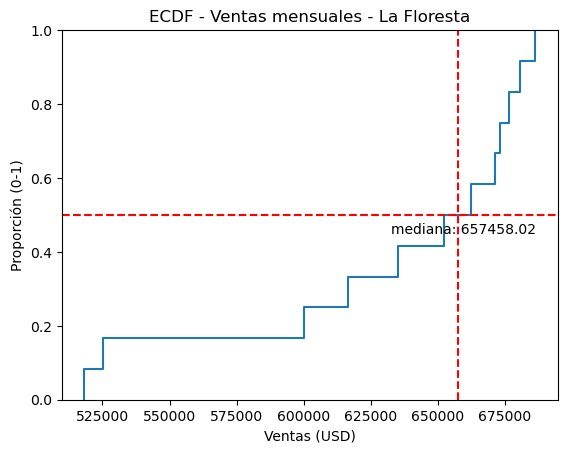

In [6]:
sns.ecdfplot(df_ventas_mensuales_LF['Ventas'])

median_LF=df_ventas_mensuales_LF['Ventas'].median()
plt.axhline(0.5, color='r', linestyle='--')
plt.axvline(median_LF, color='r', linestyle='--')
plt.annotate(f"mediana: {round(median_LF, 2)}", (median_LF-25000, 0.5-0.05))

plt.title('ECDF - Ventas mensuales - La Floresta')
plt.xlabel('Ventas (USD)')
plt.ylabel('Proporción (0-1)')


Text(0, 0.5, 'Proporción (0-1)')

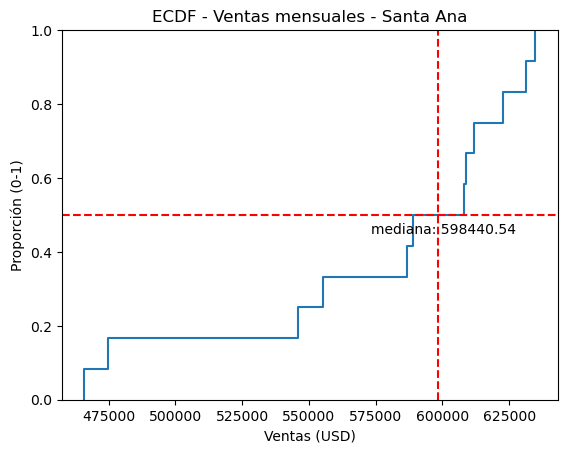

In [7]:
sns.ecdfplot(df_ventas_mensuales_SA['Ventas'])

median_SA=df_ventas_mensuales_SA['Ventas'].median()
plt.axhline(0.5, color='r', linestyle='--')
plt.axvline(median_SA, color='r', linestyle='--')
plt.annotate(f"mediana: {round(median_SA, 2)}", (median_SA-25000, 0.5-0.05))

plt.title('ECDF - Ventas mensuales - Santa Ana')
plt.xlabel('Ventas (USD)')
plt.ylabel('Proporción (0-1)')

### Histograma de ventas mensuales

Text(0, 0.5, 'Densidad de probabilidad')

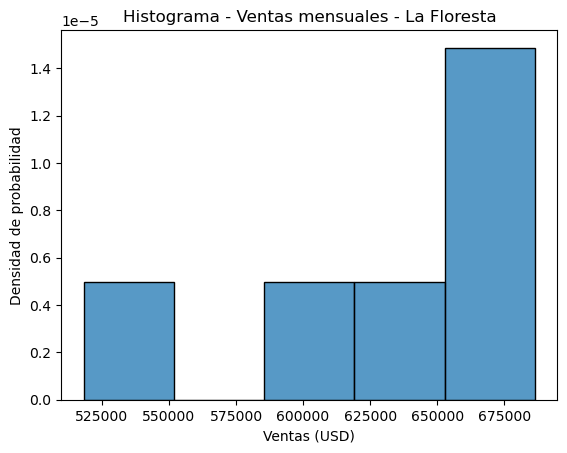

In [8]:
sns.histplot(df_ventas_mensuales_LF['Ventas'], stat='density')

plt.title('Histograma - Ventas mensuales - La Floresta')
plt.xlabel('Ventas (USD)')
plt.ylabel('Densidad de probabilidad')

Text(0, 0.5, 'Densidad')

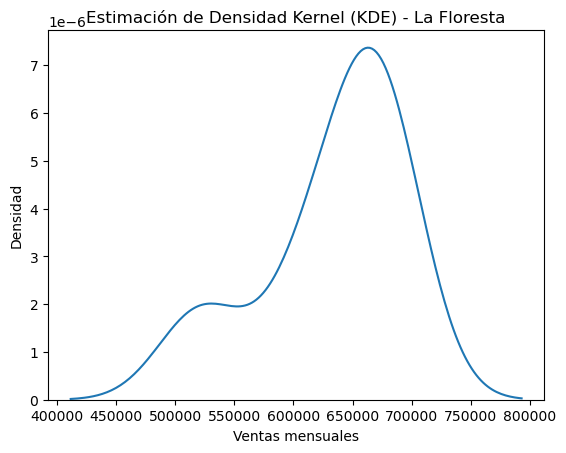

In [9]:
sns.kdeplot(df_ventas_mensuales_LF['Ventas'])

plt.title('Estimación de Densidad Kernel (KDE) - La Floresta')
plt.xlabel('Ventas mensuales')
plt.ylabel('Densidad')

Text(0, 0.5, 'Densidad de probabilidad')

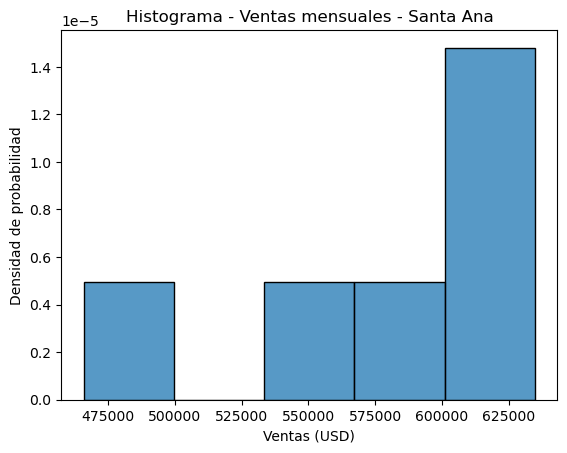

In [10]:
sns.histplot(df_ventas_mensuales_SA['Ventas'], stat='density')

plt.title('Histograma - Ventas mensuales - Santa Ana')
plt.xlabel('Ventas (USD)')
plt.ylabel('Densidad de probabilidad')

Text(0, 0.5, 'Densidad')

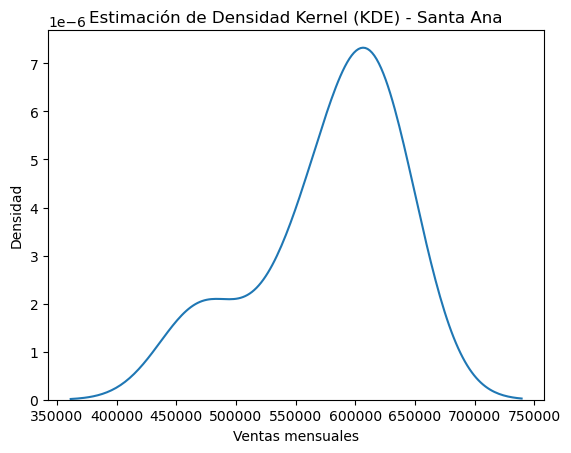

In [11]:
sns.kdeplot(df_ventas_mensuales_SA['Ventas'])

plt.title('Estimación de Densidad Kernel (KDE) - Santa Ana')
plt.xlabel('Ventas mensuales')
plt.ylabel('Densidad')

## Análisis de ventas por mes en cada tienda

In [12]:
# dfs_por_mes es un diccionario donde las claves son números de mes y los valores son dataframes para cada mes
dfs_por_mes_LF = {}
for month, sales in df_La_Floresta.groupby(df_La_Floresta['Fecha'].dt.month):
    dfs_por_mes_LF[month] = sales

dfs_por_mes_SA = {}
for month, sales in df_Santa_Ana.groupby(df_Santa_Ana['Fecha'].dt.month):
    dfs_por_mes_SA[month] = sales



### Gráficas - Ventas por mes - La Floresta

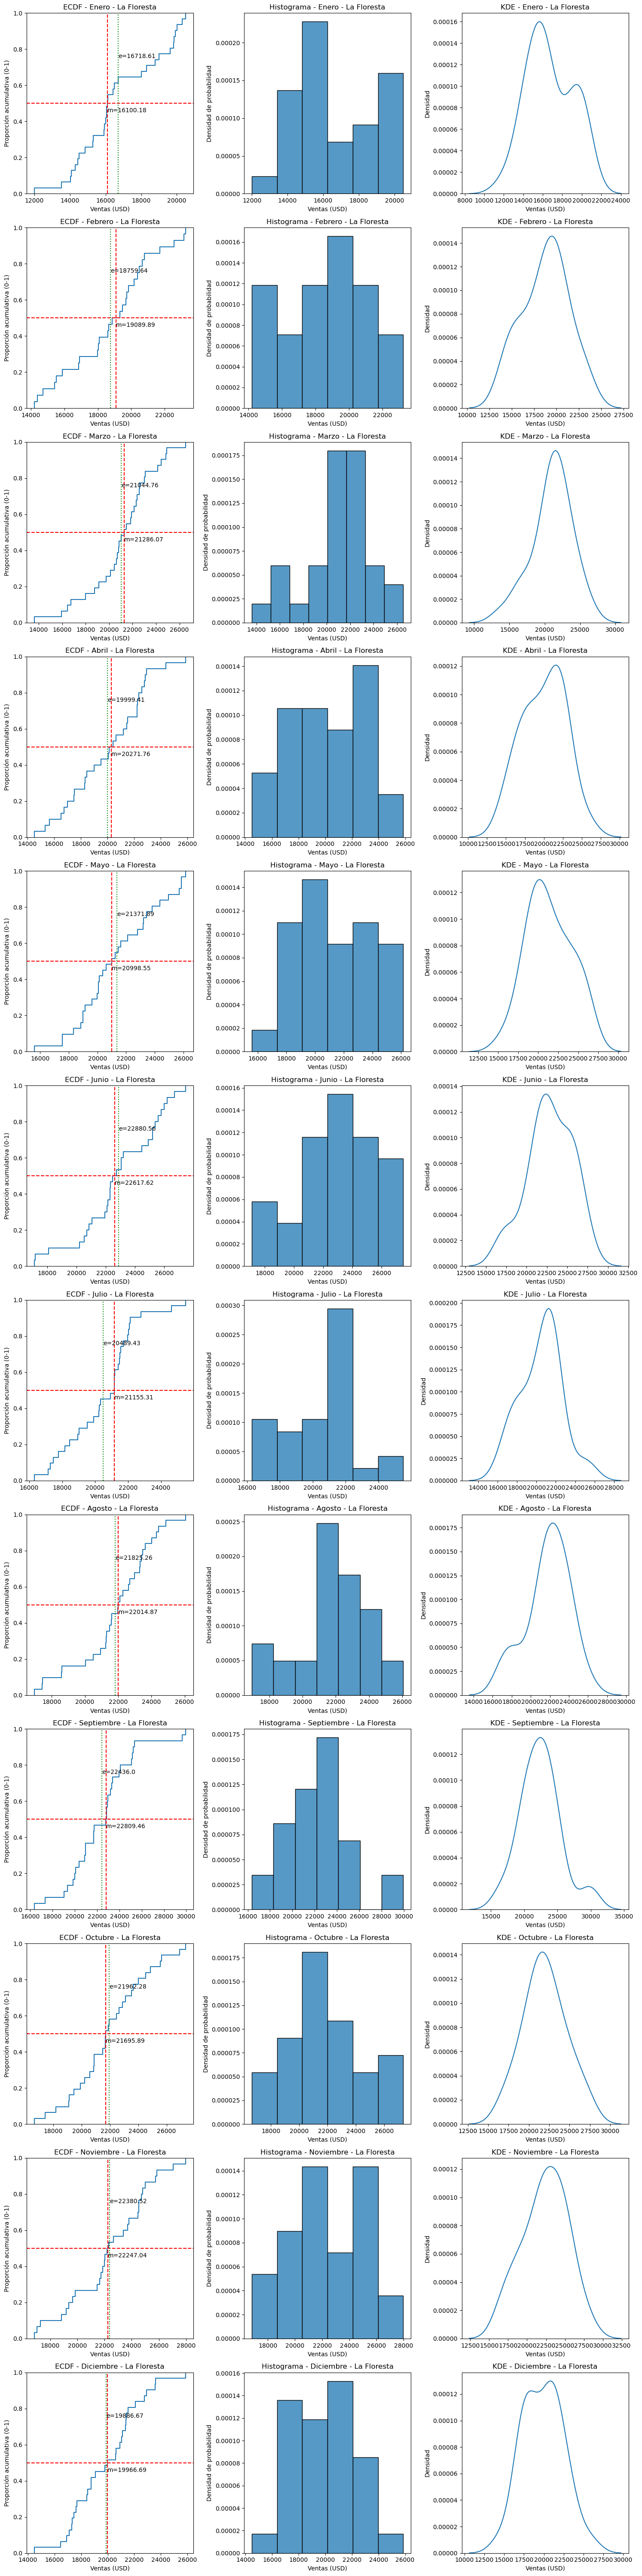

In [13]:
fig, axs = plt.subplots(len(dfs_por_mes_LF), 3, figsize=(15, 5 * len(dfs_por_mes_LF)))

for idx, (month, df_month_LF) in enumerate(dfs_por_mes_LF.items()):

    month_esn = format_date(date(2023, month, 1), format='MMMM', locale=locale)
    
    # ECDF plot
    sns.ecdfplot(ax=axs[idx, 0], data=df_month_LF['Ventas'])
    axs[idx, 0].set_title(f"ECDF - {month_esn.capitalize()} - La Floresta")
    axs[idx, 0].set_xlabel('Ventas (USD)')
    axs[idx, 0].set_ylabel('Proporción acumulativa (0-1)')
    median_LF = df_month_LF['Ventas'].median()
    mean_LF = df_month_LF['Ventas'].mean()
    axs[idx, 0].axhline(0.5, color='r', linestyle='--')
    axs[idx, 0].axvline(median_LF, color='r', linestyle='--')
    axs[idx, 0].annotate(f"m={round(median_LF, 2)}", (median_LF, 0.5-0.05))
    axs[idx, 0].axvline(mean_LF, color='g', linestyle='dotted')
    axs[idx, 0].annotate(f"e={round(mean_LF, 2)}", (mean_LF, 0.75))

    # Histograma
    sns.histplot(ax=axs[idx, 1], data=df_month_LF['Ventas'], stat='density')
    axs[idx, 1].set_title(f"Histograma - {month_esn.capitalize()} - La Floresta")
    axs[idx, 1].set_xlabel('Ventas (USD)')
    axs[idx, 1].set_ylabel('Densidad de probabilidad')
    
    # KDE plot
    sns.kdeplot(ax=axs[idx, 2], data=df_month_LF['Ventas'])
    axs[idx, 2].set_title(f"KDE - {month_esn.capitalize()} - La Floresta")
    axs[idx, 2].set_xlabel('Ventas (USD)')
    axs[idx, 2].set_ylabel('Densidad')


plt.tight_layout()
plt.show()

### Gráficas - Ventas por mes - Santa Ana

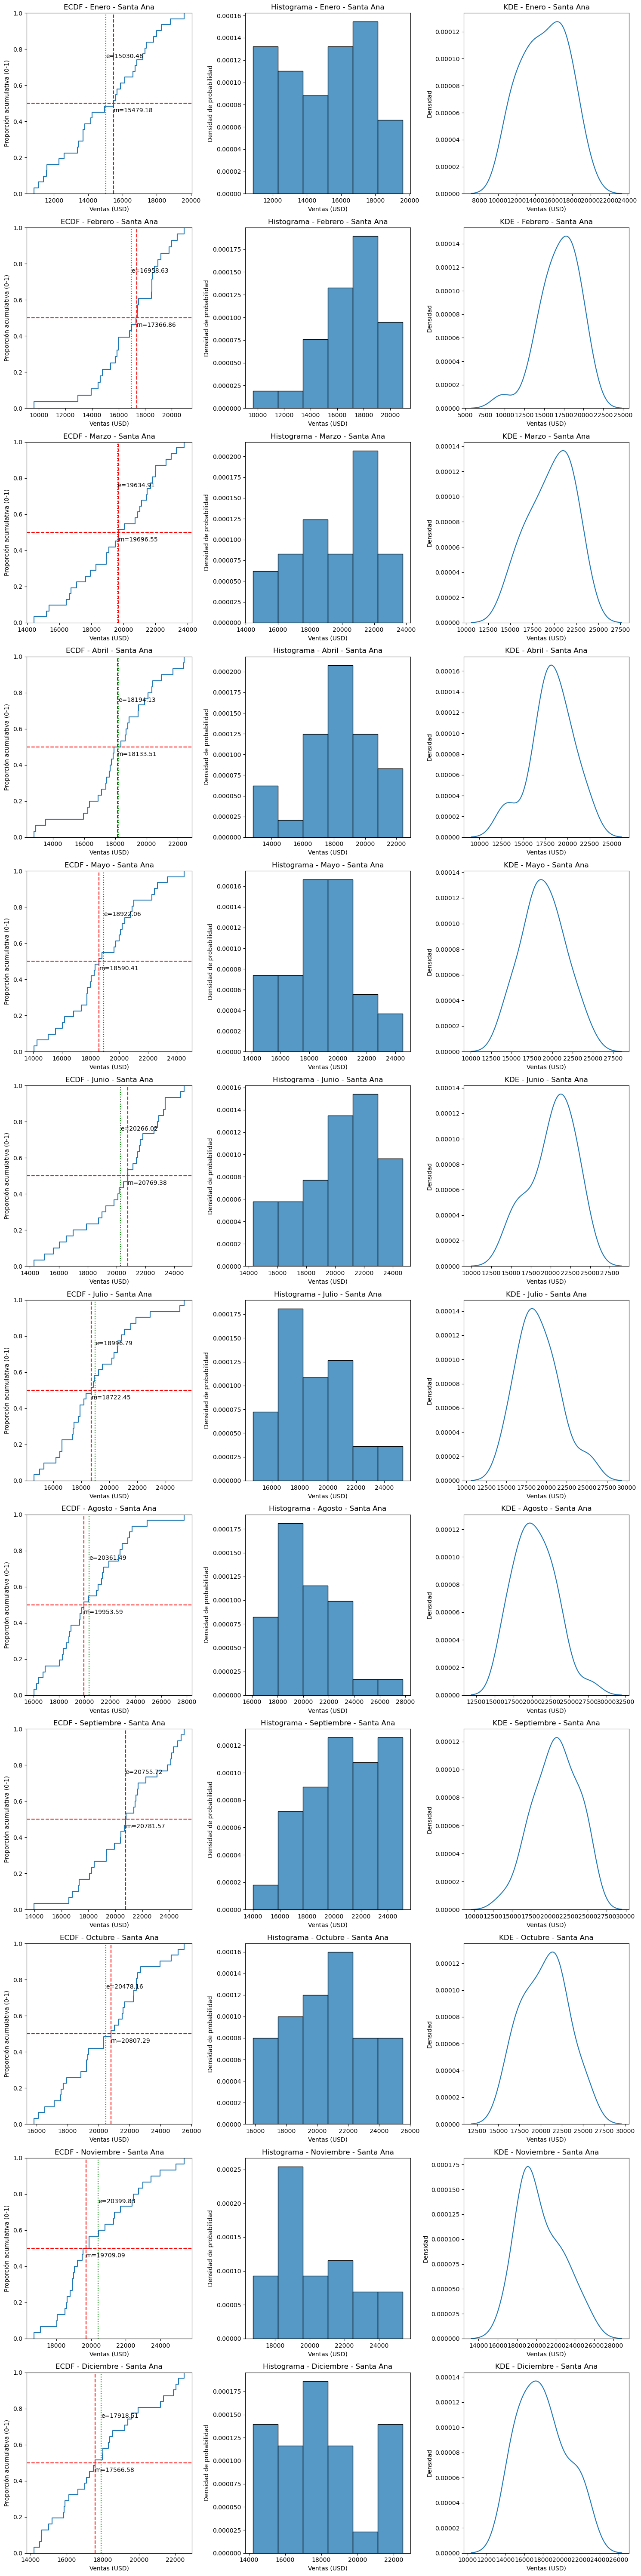

In [14]:
fig, axs = plt.subplots(len(dfs_por_mes_SA), 3, figsize=(15, 5 * len(dfs_por_mes_SA)))

for idx, (month, df_month_SA) in enumerate(dfs_por_mes_SA.items()):

    month_esn = format_date(date(2023, month, 1), format='MMMM', locale=locale)
    
    # ECDF plot
    sns.ecdfplot(ax=axs[idx, 0], data=df_month_SA['Ventas'])
    axs[idx, 0].set_title(f"ECDF - {month_esn.capitalize()} - Santa Ana")
    axs[idx, 0].set_xlabel('Ventas (USD)')
    axs[idx, 0].set_ylabel('Proporción acumulativa (0-1)')
    median_SA = df_month_SA['Ventas'].median()
    mean_SA = df_month_SA['Ventas'].mean()
    axs[idx, 0].axhline(0.5, color='r', linestyle='--')
    axs[idx, 0].axvline(median_SA, color='r', linestyle='--')
    axs[idx, 0].annotate(f"m={round(median_SA, 2)}", (median_SA, 0.5-0.05))
    axs[idx, 0].axvline(mean_SA, color='g', linestyle='dotted')
    axs[idx, 0].annotate(f"e={round(mean_SA, 2)}", (mean_SA, 0.75))
    
    # Histograma
    sns.histplot(ax=axs[idx, 1], data=df_month_SA['Ventas'], stat='density')
    axs[idx, 1].set_title(f"Histograma - {month_esn.capitalize()} - Santa Ana")
    axs[idx, 1].set_xlabel('Ventas (USD)')
    axs[idx, 1].set_ylabel('Densidad de probabilidad')
    
    # KDE plot
    sns.kdeplot(ax=axs[idx, 2], data=df_month_SA['Ventas'])
    axs[idx, 2].set_title(f"KDE - {month_esn.capitalize()} - Santa Ana")
    axs[idx, 2].set_xlabel('Ventas (USD)')
    axs[idx, 2].set_ylabel('Densidad')


plt.tight_layout()
plt.show()

### Intervalos de confianza (Media mensual) - La Floresta

In [15]:
for idx, (month, df_month_LF) in enumerate(dfs_por_mes_LF.items()):

    month_esn = format_date(date(2023, month, 1), format='MMMM', locale=locale)
 
    mean_LF = df_month_LF['Ventas'].mean() # Media muestral
    std_dev_LF = df_month_LF['Ventas'].std(ddof=1)  # Estimación insesgada del desvío estándar de la muestra
    n = len(df_month_LF) # Cantidad de datos de la muestra

    fd = n - 1 # Grados de libertad para la distribución t de Student
    
    ci_level_1 = 0.95 # Nivel de confianza
    ci_level_2 = 0.99 # Nivel de confianza

    # Intervalos de confianza
    margin_error_1 = stats.t.ppf((1 + ci_level_1) / 2, fd) * (std_dev_LF / np.sqrt(n))
    lower_ci_1 = mean_LF - margin_error_1
    upper_ci_1 = mean_LF + margin_error_1

    margin_error_2 = stats.t.ppf((1 + ci_level_2) / 2, fd) * (std_dev_LF / np.sqrt(n))
    lower_ci_2 = mean_LF - margin_error_2
    upper_ci_2 = mean_LF + margin_error_2

    title_i = (f"La Floresta - Ventas {month_esn} (USD)")
    display(HTML("<b>"+title_i+"</b>"))
    data_i = {
    'Límite inferior': [round(lower_ci_1, 2), round(lower_ci_2, 2)],
    'Media': [round(mean_LF, 2), round(mean_LF, 2)],
    'Límite superior': [round(upper_ci_2, 2), round(upper_ci_2, 2)]
    }
    df_i = pd.DataFrame(data_i, index=[f"{ci_level_1:.0%}", f"{ci_level_2:.0%}"])
    display(df_i.head())
    print()


,Límite inferior,Media,Límite superior
95%,15863.27,16718.61,17870.35
99%,15566.87,16718.61,17870.35


,Límite inferior,Media,Límite superior
95%,17768.69,18759.64,20097.76
99%,17421.52,18759.64,20097.76


,Límite inferior,Media,Límite superior
95%,20002.89,21044.76,22447.68
99%,19641.85,21044.76,22447.68


,Límite inferior,Media,Límite superior
95%,18934.68,19999.41,21434.36
99%,18564.46,19999.41,21434.36


,Límite inferior,Media,Límite superior
95%,20355.83,21371.89,22740.03
99%,20003.74,21371.89,22740.03


,Límite inferior,Media,Límite superior
95%,21867.75,22880.56,24245.53
99%,21515.59,22880.56,24245.53


,Límite inferior,Media,Límite superior
95%,19708.30,20489.43,21541.26
99%,19437.61,20489.43,21541.26


,Límite inferior,Media,Límite superior
95%,21002.64,21825.26,22932.95
99%,20717.57,21825.26,22932.95


,Límite inferior,Media,Límite superior
95%,21313.20,22436.0,23949.23
99%,20922.78,22436.0,23949.23


,Límite inferior,Media,Límite superior
95%,21000.44,21962.28,23257.44
99%,20667.12,21962.28,23257.44


,Límite inferior,Media,Límite superior
95%,21290.80,22380.52,23849.14
99%,20911.89,22380.52,23849.14


,Límite inferior,Media,Límite superior
95%,18954.06,19886.67,21142.46
99%,18630.88,19886.67,21142.46


### Intervalos de confianza (Media mensual) - Santa Ana

In [16]:
for idx, (month, df_month_SA) in enumerate(dfs_por_mes_SA.items()):

    month_esn = format_date(date(2023, month, 1), format='MMMM', locale=locale)
 
    mean_SA = df_month_SA['Ventas'].mean() # Media muestral
    std_dev_SA = df_month_SA['Ventas'].std(ddof=1)  # Estimación insesgada del desvío estándar de la muestra
    n = len(df_month_SA) # Cantidad de datos de la muestra

    fd = n - 1 # Grados de libertad para la distribución t de Student
    
    ci_level_1 = 0.95 # Nivel de confianza
    ci_level_2 = 0.99 # Nivel de confianza

    # Intervalos de confianza
    margin_error_1 = stats.t.ppf((1 + ci_level_1) / 2, fd) * (std_dev_SA / np.sqrt(n))
    lower_ci_1 = mean_SA - margin_error_1
    upper_ci_1 = mean_SA + margin_error_1

    margin_error_2 = stats.t.ppf((1 + ci_level_2) / 2, fd) * (std_dev_SA / np.sqrt(n))
    lower_ci_2 = mean_SA - margin_error_2
    upper_ci_2 = mean_SA + margin_error_2

    title_i = (f"Santa Ana - Ventas {month_esn} (USD)")
    display(HTML("<b>"+title_i+"</b>"))
    data_i = {
    'Límite inferior': [round(lower_ci_1, 2), round(lower_ci_2, 2)],
    'Media': [round(mean_SA, 2), round(mean_SA, 2)],
    'Límite superior': [round(upper_ci_2, 2), round(upper_ci_2, 2)]
    }
    df_i = pd.DataFrame(data_i, index=[f"{ci_level_1:.0%}", f"{ci_level_2:.0%}"])
    display(df_i.head())
    print()

,Límite inferior,Media,Límite superior
95%,14120.01,15030.48,16256.45
99%,13804.50,15030.48,16256.45


,Límite inferior,Media,Límite superior
95%,15986.18,16958.63,18271.77
99%,15645.48,16958.63,18271.77


,Límite inferior,Media,Límite superior
95%,18702.64,19634.91,20890.26
99%,18379.57,19634.91,20890.26


,Límite inferior,Media,Límite superior
95%,17284.58,18194.13,19419.96
99%,16968.31,18194.13,19419.96


,Límite inferior,Media,Límite superior
95%,17953.51,18922.06,20226.24
99%,17617.87,18922.06,20226.24


,Límite inferior,Media,Límite superior
95%,19210.47,20266.02,21688.59
99%,18843.45,20266.02,21688.59


,Límite inferior,Media,Límite superior
95%,18028.10,18996.79,20301.18
99%,17692.41,18996.79,20301.18


,Límite inferior,Media,Límite superior
95%,19340.83,20361.49,21735.85
99%,18987.13,20361.49,21735.85


,Límite inferior,Media,Límite superior
95%,19694.35,20755.72,22186.13
99%,19325.30,20755.72,22186.13


,Límite inferior,Media,Límite superior
95%,19502.91,20478.16,21791.38
99%,19164.94,20478.16,21791.38


,Límite inferior,Media,Límite superior
95%,19548.91,20399.83,21546.62
99%,19253.04,20399.83,21546.62


,Límite inferior,Media,Límite superior
95%,16996.23,17918.51,19160.39
99%,16676.62,17918.51,19160.39


## Análisis de ventas por día de la semana en cada tienda

In [17]:
week_esn = get_day_names('wide', locale=locale)

df_xdw_LF = df_La_Floresta.groupby(df_La_Floresta['Fecha'].dt.dayofweek)

dfs_xdw_LF = {week_esn[nday]: df_nday for nday, df_nday in df_xdw_LF}

for day_i, df_day_i in dfs_xdw_LF.items():
    display(HTML("<b>La Floresta - ***"+day_i.upper()+"***</b>"))
    display(df_day_i.head())


,Fecha,Ventas
1,2023-01-02,16048.495794
8,2023-01-09,14306.702196
15,2023-01-16,14863.565653
22,2023-01-23,14519.581934
29,2023-01-30,18308.235582


,Fecha,Ventas
2,2023-01-03,18003.638225
9,2023-01-10,19809.112715
16,2023-01-17,19916.429442
23,2023-01-24,20300.552237
30,2023-01-31,14447.159017


,Fecha,Ventas
3,2023-01-04,20012.607108
10,2023-01-11,16063.642704
17,2023-01-18,18998.595024
24,2023-01-25,19852.505583
31,2023-02-01,19837.900009


,Fecha,Ventas
4,2023-01-05,16710.240063
11,2023-01-12,15918.282081
18,2023-01-19,20494.895704
25,2023-01-26,18778.708404
32,2023-02-02,23249.684967


,Fecha,Ventas
5,2023-01-06,15943.734737
12,2023-01-13,15317.169138
19,2023-01-20,16482.590230
26,2023-01-27,19628.903105
33,2023-02-03,18594.074278


,Fecha,Ventas
6,2023-01-07,16417.757153
13,2023-01-14,16006.063914
20,2023-01-21,16122.071187
27,2023-01-28,14070.689171
34,2023-02-04,15529.892321


,Fecha,Ventas
0,2023-01-01,11996.124122
7,2023-01-08,16100.176366
14,2023-01-15,14025.869502
21,2023-01-22,15275.590257
28,2023-01-29,13537.121249


In [18]:
df_xdw_SA = df_Santa_Ana.groupby(df_Santa_Ana['Fecha'].dt.dayofweek)

dfs_xdw_SA = {week_esn[nday]: df_nday for nday, df_nday in df_xdw_SA}

for day_i, df_day_i in dfs_xdw_SA.items():
    display(HTML("<b>Santa Ana - ***"+day_i.upper()+"***</b>"))
    display(df_day_i.head())

,Fecha,Ventas
1,2023-01-02,16122.907022
8,2023-01-09,11088.125026
15,2023-01-16,15876.095909
22,2023-01-23,11559.520356
29,2023-01-30,16838.881980


,Fecha,Ventas
2,2023-01-03,19609.303029
9,2023-01-10,14142.304273
16,2023-01-17,17324.941555
23,2023-01-24,12580.487944
30,2023-01-31,15479.177590


,Fecha,Ventas
3,2023-01-04,16734.047386
10,2023-01-11,18277.610424
17,2023-01-18,15670.522398
24,2023-01-25,14948.885676
31,2023-02-01,18950.756326


,Fecha,Ventas
4,2023-01-05,17983.552354
11,2023-01-12,17397.198073
18,2023-01-19,17180.765076
25,2023-01-26,13358.929439
32,2023-02-02,20949.631209


,Fecha,Ventas
5,2023-01-06,17807.001923
12,2023-01-13,13692.132416
19,2023-01-20,13697.454593
26,2023-01-27,16615.137348
33,2023-02-03,17312.223582


,Fecha,Ventas
6,2023-01-07,12287.229202
13,2023-01-14,13809.251599
20,2023-01-21,14232.797471
27,2023-01-28,18796.277627
34,2023-02-04,15969.634693


,Fecha,Ventas
0,2023-01-01,11390.705369
7,2023-01-08,13428.794375
14,2023-01-15,10841.822125
21,2023-01-22,11575.458651
28,2023-01-29,15597.434125


### Gráficas - Ventas por mes - La Floresta

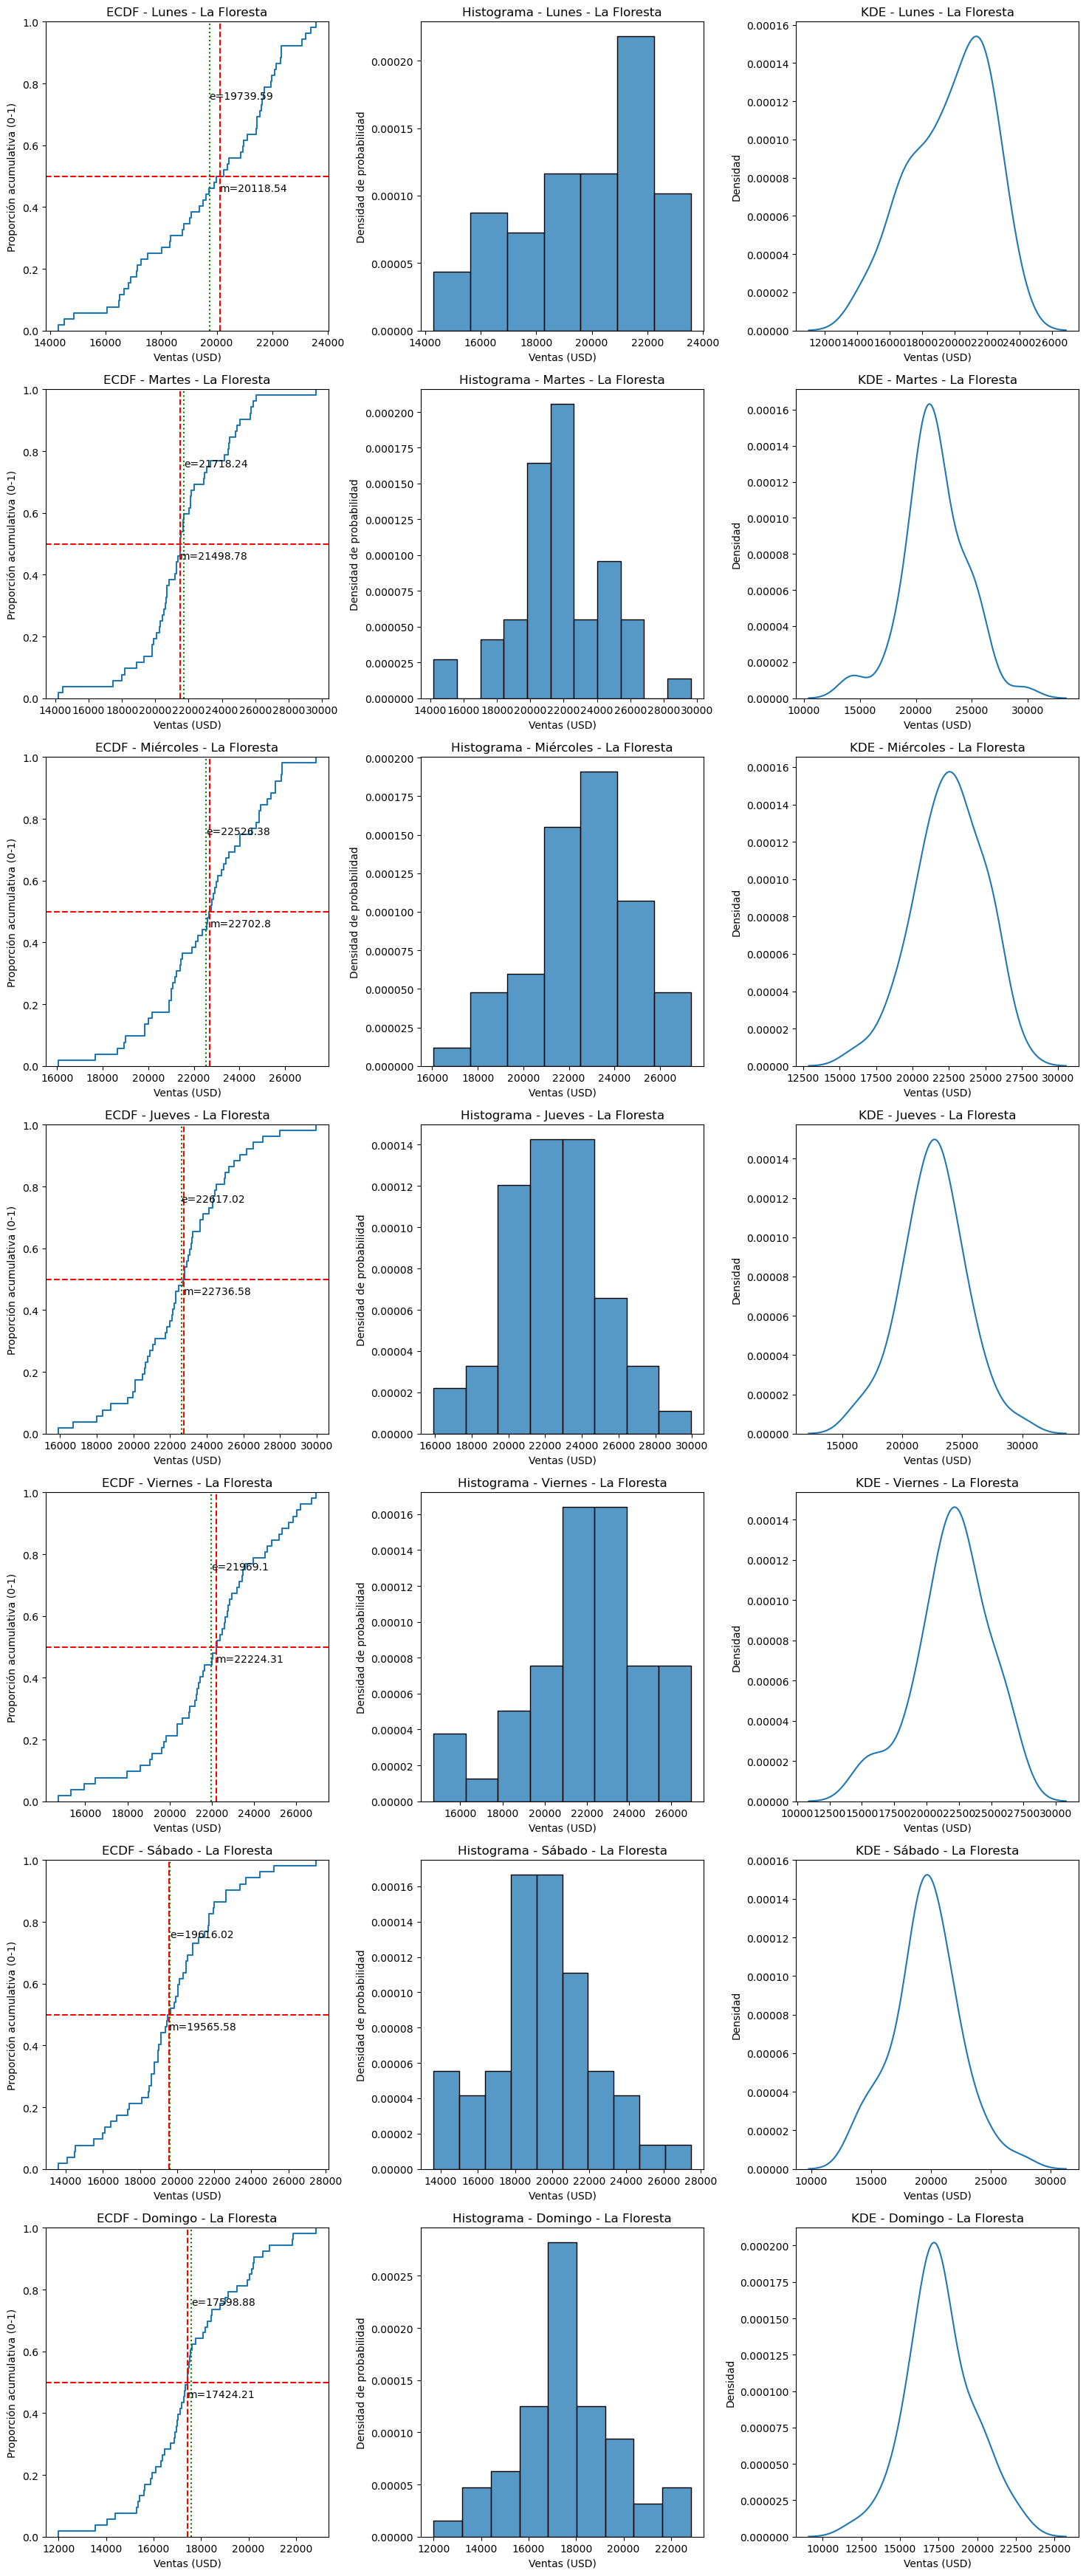

In [19]:
fig, axs = plt.subplots(len(dfs_xdw_LF), 3, figsize=(15, 5 * len(dfs_xdw_LF)))

for idx, (dayw_esn, df_dayw_LF) in enumerate(dfs_xdw_LF.items()):

    # ECDF plot
    sns.ecdfplot(ax=axs[idx, 0], data=df_dayw_LF['Ventas'])
    axs[idx, 0].set_title(f"ECDF - {dayw_esn.capitalize()} - La Floresta")
    axs[idx, 0].set_xlabel('Ventas (USD)')
    axs[idx, 0].set_ylabel('Proporción acumulativa (0-1)')
    median_LF = df_dayw_LF['Ventas'].median()
    mean_LF = df_dayw_LF['Ventas'].mean()
    axs[idx, 0].axhline(0.5, color='r', linestyle='--')
    axs[idx, 0].axvline(median_LF, color='r', linestyle='--')
    axs[idx, 0].annotate(f"m={round(median_LF, 2)}", (median_LF, 0.5-0.05))
    axs[idx, 0].axvline(mean_LF, color='g', linestyle='dotted')
    axs[idx, 0].annotate(f"e={round(mean_LF, 2)}", (mean_LF, 0.75))
    
    # Histograma
    sns.histplot(ax=axs[idx, 1], data=df_dayw_LF['Ventas'], stat='density')
    axs[idx, 1].set_title(f"Histograma - {dayw_esn.capitalize()} - La Floresta")
    axs[idx, 1].set_xlabel('Ventas (USD)')
    axs[idx, 1].set_ylabel('Densidad de probabilidad')
    
    # KDE plot
    sns.kdeplot(ax=axs[idx, 2], data=df_dayw_LF['Ventas'])
    axs[idx, 2].set_title(f"KDE - {dayw_esn.capitalize()} - La Floresta")
    axs[idx, 2].set_xlabel('Ventas (USD)')
    axs[idx, 2].set_ylabel('Densidad')


plt.tight_layout()
plt.show()

### Gráficas - Ventas por mes - Santa Ana

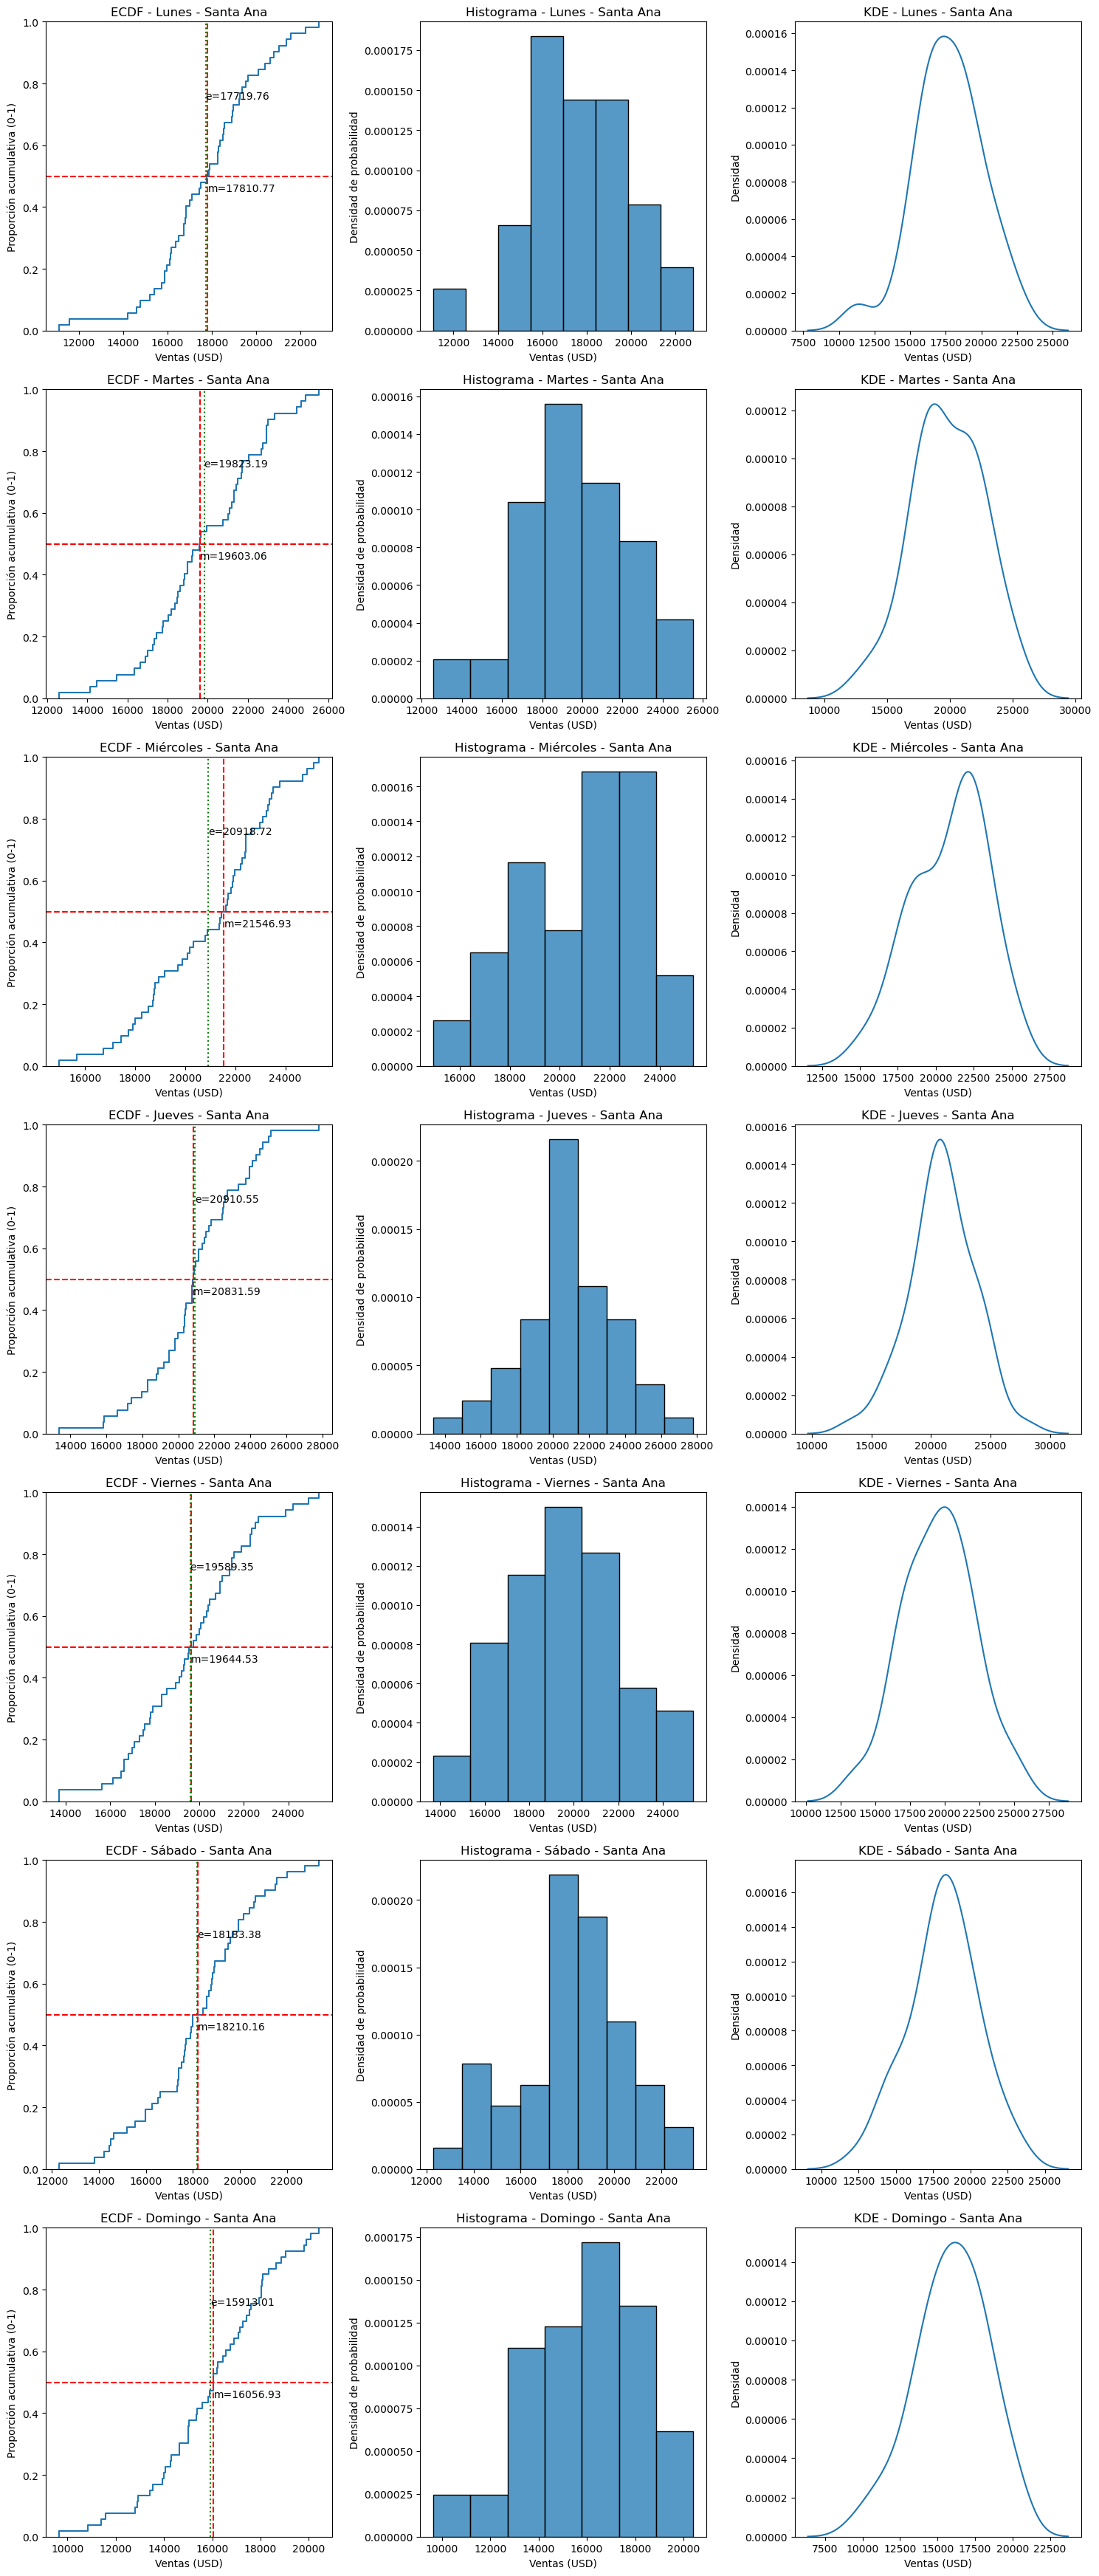

In [20]:
fig, axs = plt.subplots(len(dfs_xdw_SA), 3, figsize=(15, 5 * len(dfs_xdw_SA)))

for idx, (dayw_esn, df_dayw_SA) in enumerate(dfs_xdw_SA.items()):

    # ECDF plot
    sns.ecdfplot(ax=axs[idx, 0], data=df_dayw_SA['Ventas'])
    axs[idx, 0].set_title(f"ECDF - {dayw_esn.capitalize()} - Santa Ana")
    axs[idx, 0].set_xlabel('Ventas (USD)')
    axs[idx, 0].set_ylabel('Proporción acumulativa (0-1)')
    median_SA = df_dayw_SA['Ventas'].median()
    mean_SA = df_dayw_SA['Ventas'].mean()
    axs[idx, 0].axhline(0.5, color='r', linestyle='--')
    axs[idx, 0].axvline(median_SA, color='r', linestyle='--')
    axs[idx, 0].annotate(f"m={round(median_SA, 2)}", (median_SA, 0.5-0.05))
    axs[idx, 0].axvline(mean_SA, color='g', linestyle='dotted')
    axs[idx, 0].annotate(f"e={round(mean_SA, 2)}", (mean_SA, 0.75))
    
    # Histograma
    sns.histplot(ax=axs[idx, 1], data=df_dayw_SA['Ventas'], stat='density')
    axs[idx, 1].set_title(f"Histograma - {dayw_esn.capitalize()} - Santa Ana")
    axs[idx, 1].set_xlabel('Ventas (USD)')
    axs[idx, 1].set_ylabel('Densidad de probabilidad')
    
    # KDE plot
    sns.kdeplot(ax=axs[idx, 2], data=df_dayw_SA['Ventas'])
    axs[idx, 2].set_title(f"KDE - {dayw_esn.capitalize()} - Santa Ana")
    axs[idx, 2].set_xlabel('Ventas (USD)')
    axs[idx, 2].set_ylabel('Densidad')


plt.tight_layout()
plt.show()

### Intervalos de confianza (Media mensual) - La Floresta

In [21]:
for idx, (dayw_esn, df_dayw_LF) in enumerate(dfs_xdw_LF.items()):
 
    mean_LF = df_dayw_LF['Ventas'].mean() # Media muestral
    std_dev_LF = df_dayw_LF['Ventas'].std(ddof=1)  # Estimación insesgada del desvío estándar de la muestra
    n = len(df_dayw_LF) # Cantidad de datos de la muestra

    fd = n - 1 # Grados de libertad para la distribución t de Student
    
    ci_level_1 = 0.95 # Nivel de confianza
    ci_level_2 = 0.99 # Nivel de confianza

    # Intervalos de confianza
    margin_error_1 = stats.t.ppf((1 + ci_level_1) / 2, fd) * (std_dev_LF / np.sqrt(n))
    lower_ci_1 = mean_LF - margin_error_1
    upper_ci_1 = mean_LF + margin_error_1

    margin_error_2 = stats.t.ppf((1 + ci_level_2) / 2, fd) * (std_dev_LF / np.sqrt(n))
    lower_ci_2 = mean_LF - margin_error_2
    upper_ci_2 = mean_LF + margin_error_2

    title_i = (f"La Floresta - Ventas {dayw_esn.upper()} (USD)")
    display(HTML("<b>"+title_i+"</b>"))
    data_i = {
    'Límite inferior': [round(lower_ci_1, 2), round(lower_ci_2, 2)],
    'Media': [round(mean_LF, 2), round(mean_LF, 2)],
    'Límite superior': [round(upper_ci_2, 2), round(upper_ci_2, 2)]
    }
    df_i = pd.DataFrame(data_i, index=[f"{ci_level_1:.0%}", f"{ci_level_2:.0%}"])
    display(df_i.head())
    print()

,Límite inferior,Media,Límite superior
95%,19061.86,19739.59,20642.87
99%,18836.31,19739.59,20642.87


,Límite inferior,Media,Límite superior
95%,20945.26,21718.24,22748.47
99%,20688.01,21718.24,22748.47


,Límite inferior,Media,Límite superior
95%,21876.93,22526.38,23391.96
99%,21660.79,22526.38,23391.96


,Límite inferior,Media,Límite superior
95%,21862.10,22617.02,23623.19
99%,21610.86,22617.02,23623.19


,Límite inferior,Media,Límite superior
95%,21184.22,21969.1,23015.19
99%,20923.01,21969.1,23015.19


,Límite inferior,Media,Límite superior
95%,18833.91,19616.02,20658.41
99%,18573.62,19616.02,20658.41


,Límite inferior,Media,Límite superior
95%,17009.25,17598.88,18384.54
99%,16813.23,17598.88,18384.54


### Intervalos de confianza (Media mensual) - Santa Ana

In [22]:
for idx, (dayw_esn, df_dayw_SA) in enumerate(dfs_xdw_SA.items()):
 
    mean_SA = df_dayw_SA['Ventas'].mean() # Media muestral
    std_dev_SA = df_dayw_SA['Ventas'].std(ddof=1)  # Estimación insesgada del desvío estándar de la muestra
    n = len(df_dayw_SA) # Cantidad de datos de la muestra

    fd = n - 1 # Grados de libertad para la distribución t de Student
    
    ci_level_1 = 0.95 # Nivel de confianza
    ci_level_2 = 0.99 # Nivel de confianza

    # Intervalos de confianza
    margin_error_1 = stats.t.ppf((1 + ci_level_1) / 2, fd) * (std_dev_SA / np.sqrt(n))
    lower_ci_1 = mean_SA - margin_error_1
    upper_ci_1 = mean_SA + margin_error_1

    margin_error_2 = stats.t.ppf((1 + ci_level_2) / 2, fd) * (std_dev_SA / np.sqrt(n))
    lower_ci_2 = mean_SA - margin_error_2
    upper_ci_2 = mean_SA + margin_error_2

    title_i = (f"Santa Ana - Ventas {dayw_esn.upper()} (USD)")
    display(HTML("<b>"+title_i+"</b>"))
    data_i = {
    'Límite inferior': [round(lower_ci_1, 2), round(lower_ci_2, 2)],
    'Media': [round(mean_SA, 2), round(mean_SA, 2)],
    'Límite superior': [round(upper_ci_2, 2), round(upper_ci_2, 2)]
    }
    df_i = pd.DataFrame(data_i, index=[f"{ci_level_1:.0%}", f"{ci_level_2:.0%}"])
    display(df_i.head())
    print()

,Límite inferior,Media,Límite superior
95%,17052.91,17719.76,18608.54
99%,16830.98,17719.76,18608.54


,Límite inferior,Media,Límite superior
95%,19028.07,19823.19,20882.94
99%,18763.44,19823.19,20882.94


,Límite inferior,Media,Límite superior
95%,20227.91,20918.72,21839.43
99%,19998.01,20918.72,21839.43


,Límite inferior,Media,Límite superior
95%,20155.03,20910.55,21917.51
99%,19903.59,20910.55,21917.51


,Límite inferior,Media,Límite superior
95%,18866.49,19589.35,20552.78
99%,18625.92,19589.35,20552.78


,Límite inferior,Media,Límite superior
95%,17529.91,18183.38,19054.33
99%,17312.43,18183.38,19054.33


,Límite inferior,Media,Límite superior
95%,15245.30,15913.01,16802.7
99%,15023.32,15913.01,16802.7


## Test de Hipótesis

* Hipótesis nula (H0): \
No hay diferencia significativa en las ventas de ambas tiendas. =>
La media de las ventas diarias de ambas tiendas no es significativamente diferente.

* Hipótesis alternativa (H1): \
En 'La Floresta' se vende menos que en'Santa Ana' => La media de las ventas diarias de 'La Floresta' es menor que la media de las ventas diarias de 'Santa Ana'.

### T de Student

In [23]:
# Significancia
alpha_1 = 0.05
alpha_2 = 0.01

t_stat, p_valor = stats.ttest_ind(df_La_Floresta['Ventas'], df_Santa_Ana['Ventas'], alternative='less')

print()
print("Para significancia del 95%:")
if p_valor < alpha_1:
    print("Se rechaza la hipótesis nula.")
    print("Hay evidencia suficiente para concluir que la tienda 'La Floresta' vende menos que la tienda 'Santa Ana'.")
else:
    print("NO hay evidencia suficiente para concluir que la tienda 'La Floresta' vende menos que la tienda 'Santa Ana'.")

print()
print("Para significancia del 99%:")
if p_valor < alpha_2:
    print("Se rechaza la hipótesis nula.")
    print("Hay evidencia suficiente para concluir que la tienda 'La Floresta' vende menos que la tienda 'Santa Ana'.")
else:
    print("NO hay evidencia suficiente para concluir que la tienda 'La Floresta' vende menos que la tienda 'Santa Ana'.")




Para significancia del 95%:
NO hay evidencia suficiente para concluir que la tienda 'La Floresta' vende menos que la tienda 'Santa Ana'.

Para significancia del 99%:
NO hay evidencia suficiente para concluir que la tienda 'La Floresta' vende menos que la tienda 'Santa Ana'.


### Método alternativo

In [24]:
from scipy.stats import mannwhitneyu

"""
Prueba de Mann-Whitney U (Wilcoxon-Mann-Whitney):

Es una prueba no paramétrica para comparar las medianas de dos muestras independientes.
No requiere que los datos sigan una distribución normal.
Es adecuada cuando las muestras son pequeñas o no se cumplen los supuestos de la prueba t.
"""

t_stat, p_valor = mannwhitneyu(df_La_Floresta['Ventas'], df_Santa_Ana['Ventas'], alternative='less')


print()
print("Para significancia del 95%:")
if p_valor < alpha_1:
    print("Se rechaza la hipótesis nula.")
    print("Hay evidencia suficiente para concluir que la tienda 'La Floresta' vende menos que la tienda 'Santa Ana'.")
else:
    print("NO hay evidencia suficiente para concluir que la tienda 'La Floresta' vende menos que la tienda 'Santa Ana'.")

print()
print("Para significancia del 99%:")
if p_valor < alpha_2:
    print("Se rechaza la hipótesis nula.")
    print("Hay evidencia suficiente para concluir que la tienda 'La Floresta' vende menos que la tienda 'Santa Ana'.")
else:
    print("NO hay evidencia suficiente para concluir que la tienda 'La Floresta' vende menos que la tienda 'Santa Ana'.")



Para significancia del 95%:
NO hay evidencia suficiente para concluir que la tienda 'La Floresta' vende menos que la tienda 'Santa Ana'.

Para significancia del 99%:
NO hay evidencia suficiente para concluir que la tienda 'La Floresta' vende menos que la tienda 'Santa Ana'.
